In [2]:
import pandas as pd
df = pd.read_csv(https://final-project-bucket-group-5.s3.us-east-1.amazonaws.com/dpd_crime_data.csv)
print(df.head())

         id Case Number                  Block  Offense Code  \
0  29000000   DPD749039     1221 Northwest Hwy         230.0   
1  29000001   DPD637037      8355 Lancaster Rd         110.0   
2  29000002   DPD050351    9488 Fort Worth Ave         230.0   
3  29000003   DPD696109        7911 Sylvan Ave         570.0   
4  29000004   DPD206113  1369 Harry Hines Blvd         900.0   

         Primary Type            Description Location Description  Arrest  \
0               Theft      Theft of Property               School   False   
1             Robbery  Robbery of Individual          Parking Lot   False   
2               Theft      Theft of Property         Retail Store   False   
3         Trespassing      Criminal Trespass          Gas Station   False   
4  Disorderly Conduct     Disorderly Conduct                Hotel   False   

   Domestic  Beat  ... Suspect Sex Suspect Race          Case Status  \
0     False  B473  ...           X        White  Under Investigation   
1     Fa

In [3]:
df.info()

(1000000, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1000000 non-null  int64  
 1   Case Number            1000000 non-null  object 
 2   Block                  1000000 non-null  object 
 3   Offense Code           949916 non-null   float64
 4   Primary Type           1000000 non-null  object 
 5   Description            1000000 non-null  object 
 6   Location Description   949991 non-null   object 
 7   Arrest                 1000000 non-null  bool   
 8   Domestic               1000000 non-null  bool   
 9   Beat                   1000000 non-null  object 
 10  Area                   1000000 non-null  object 
 11  Ward                   900146 non-null   object 
 12  Community Area         899811 non-null   object 
 13  FBI Code               1000000 non-null  object 
 14  X Coo

In [6]:
df.nunique()

id                       1000000
Case Number               632137
Block                     243068
Offense Code                  15
Primary Type                  15
Description                   15
Location Description          10
Arrest                         2
Domestic                       2
Beat                         899
Area                           5
Ward                          14
Community Area                 5
FBI Code                      15
X Coordinate                 201
Y Coordinate                 201
Year                          24
Latitude                     201
Longitude                    201
Location                   40401
weapon description             6
vict Age                      63
Vict Sex                       3
Victim Race                    5
Date OCC                    8765
Time OCC                    1440
Date Rptd                   8768
Time Rptd                   1440
Date Arrested               8765
Time Arrested               1440
Premises d

<Axes: ylabel='Primary Type'>

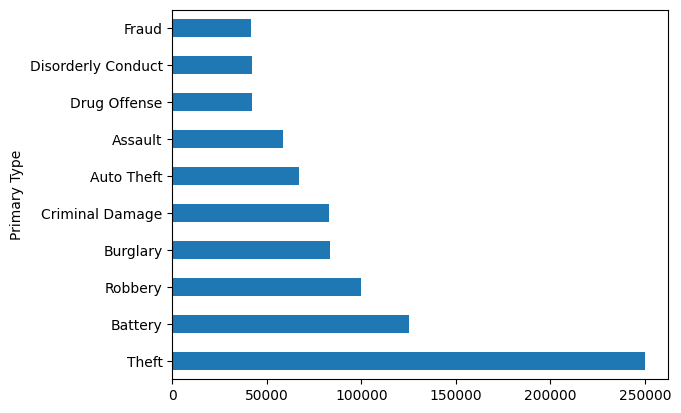

In [7]:
df['Primary Type'].value_counts().head(10).plot(kind='barh')
# catagory wise number of victims

<Axes: xlabel='Year'>

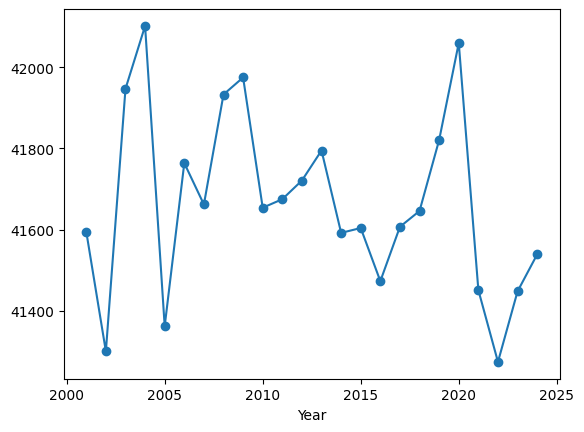

In [8]:
df['Year'].value_counts().sort_index().plot(kind='line', marker='o')


<Axes: ylabel='count'>

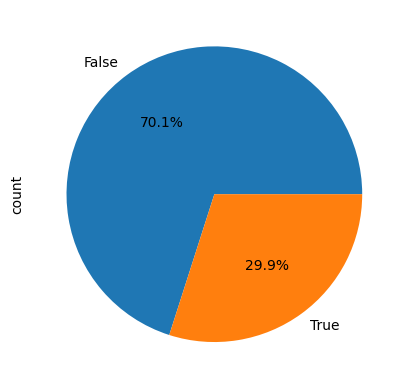

In [9]:
df['Arrest'].value_counts().plot(kind='pie', autopct='%1.1f%%')


<Axes: xlabel='Domestic'>

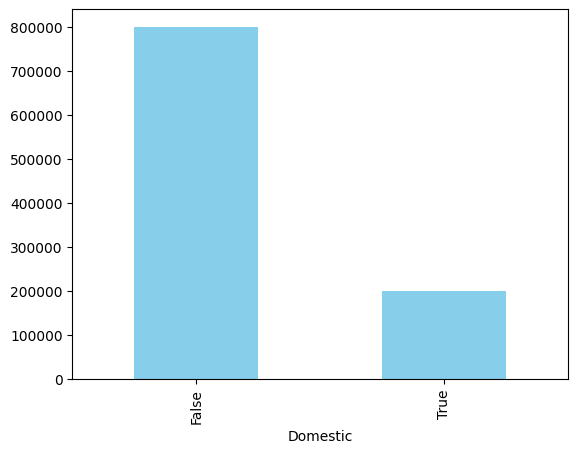

In [10]:
df['Domestic'].value_counts().plot(kind='bar', color='skyblue')
# domestic voilence from whole data

In [11]:
df['Date OCC'] = pd.to_datetime(df['Date OCC'], errors='coerce')
df['Hour'] = df['Date OCC'].dt.hour
df['DayOfWeek'] = df['Date OCC'].dt.day_name()


<Axes: ylabel='Crime Category'>

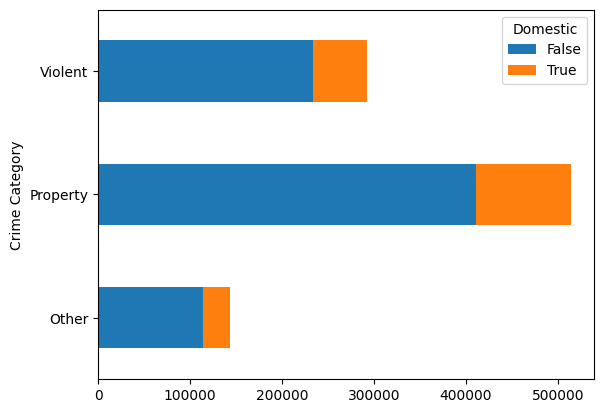

In [25]:
pd.crosstab(df['Crime Category'], df['Domestic']).plot(kind='barh', stacked=True)


In [28]:
weapon_usage_pct = df['weapon description'].notna().mean() * 100
print(f"{weapon_usage_pct:.2f}% of crimes involved a weapon.")


68.62% of crimes involved a weapon.


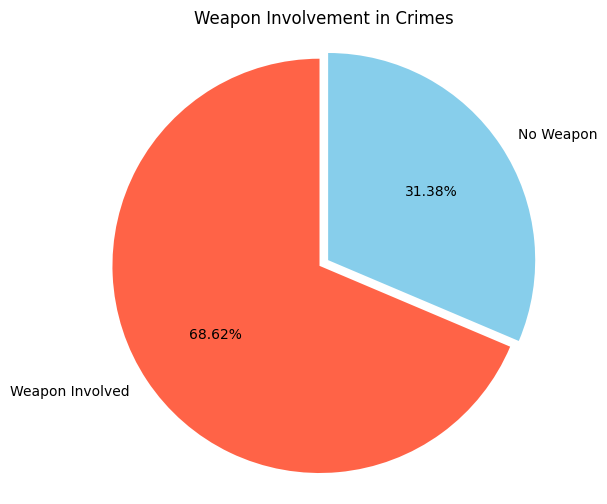

In [29]:
import matplotlib.pyplot as plt

# Calculate values
weapon_usage_pct = df['weapon description'].notna().mean() * 100
no_weapon_pct = 100 - weapon_usage_pct

# Labels and values
labels = ['Weapon Involved', 'No Weapon']
sizes = [weapon_usage_pct, no_weapon_pct]
colors = ['tomato', 'skyblue']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=(0.05, 0))
plt.title('Weapon Involvement in Crimes')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


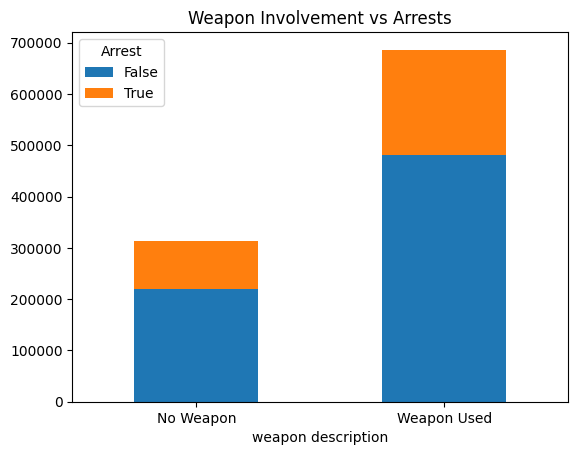

In [30]:
pd.crosstab(df['weapon description'].notna(), df['Arrest']).plot(kind='bar', stacked=True)
plt.title("Weapon Involvement vs Arrests")
plt.xticks([0,1], ['No Weapon', 'Weapon Used'], rotation=0)
plt.show()


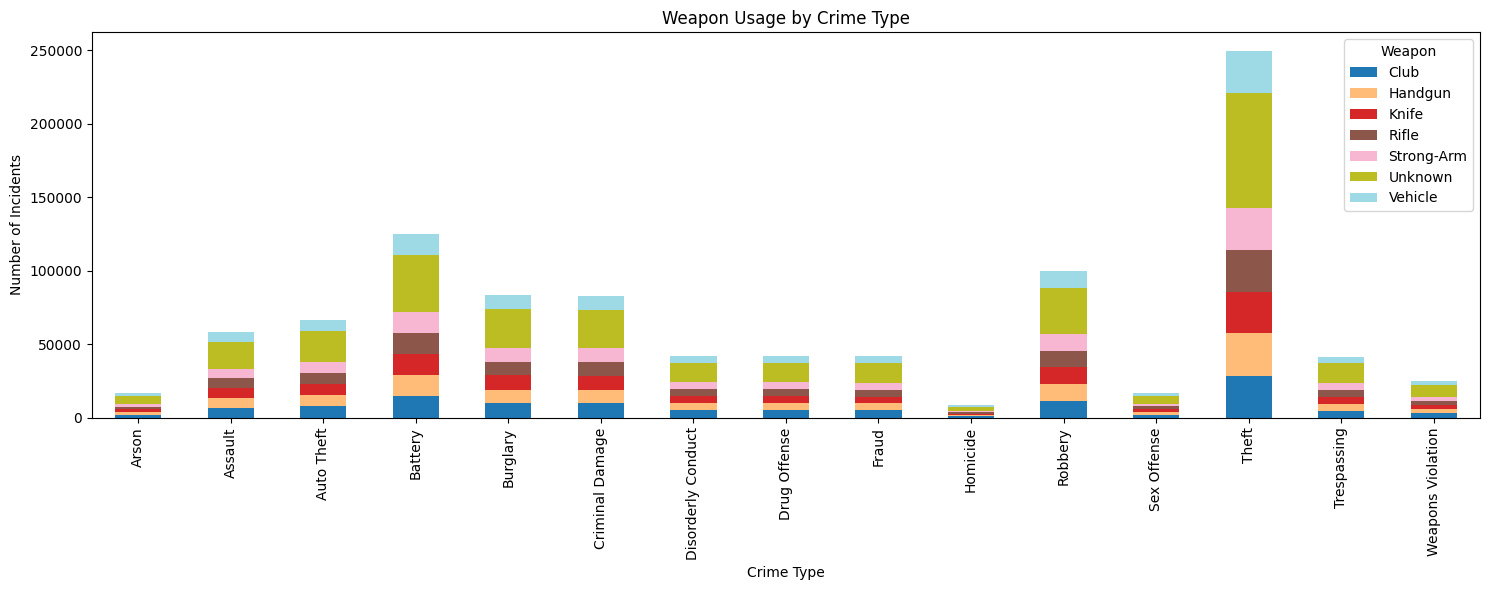

In [33]:
weapon_crime = df.groupby(['Primary Type', 'weapon description']).size().unstack().fillna(0)

weapon_crime.plot(kind='bar', stacked=True, figsize=(15, 6), colormap='tab20')
plt.title("Weapon Usage by Crime Type")
plt.xlabel("Crime Type")
plt.ylabel("Number of Incidents")
plt.legend(title='Weapon')
plt.tight_layout()
plt.show()


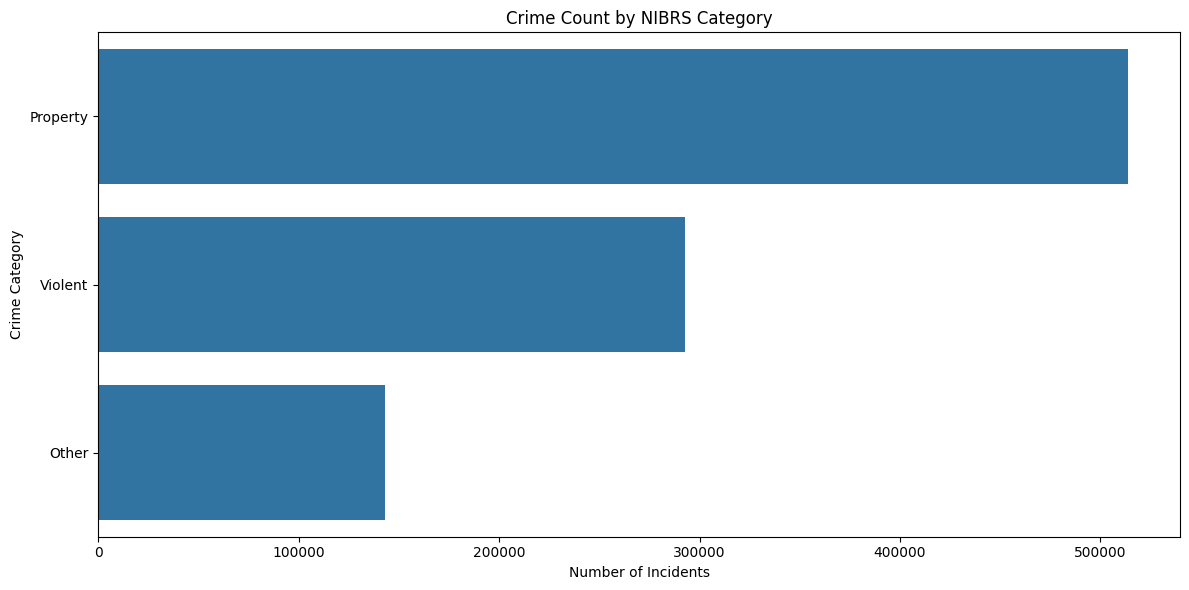

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Crime Category', order=df['Crime Category'].value_counts().index)
plt.title('Crime Count by NIBRS Category')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Category')
plt.tight_layout()
plt.show()


C:\Users\athar\AppData\Local\Temp\ipykernel_4912\2389444757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_primary.values, y=top_primary.index, palette='magma')


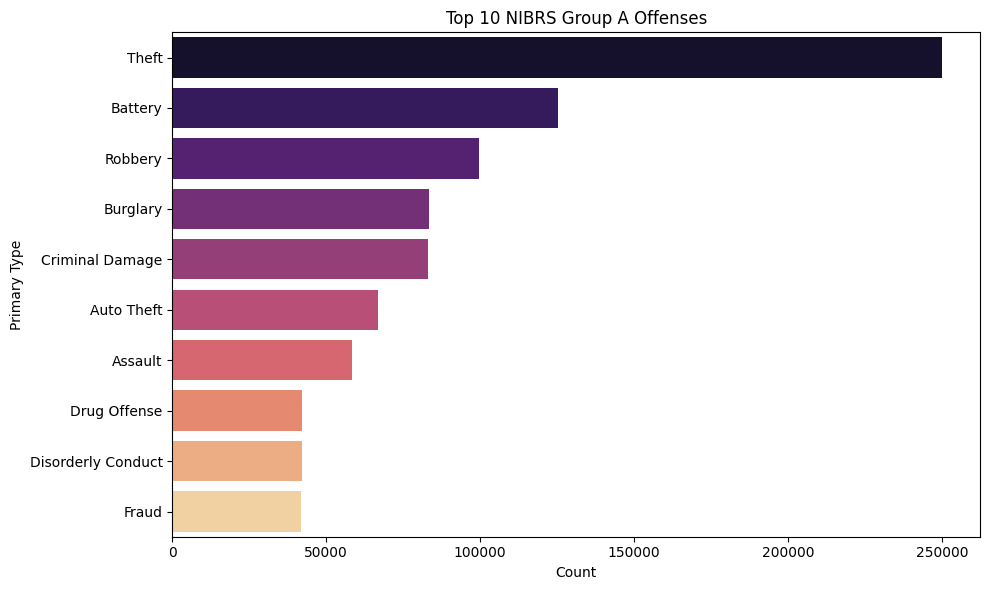

In [36]:
top_primary = df['Primary Type'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_primary.values, y=top_primary.index, palette='magma')
plt.title('Top 10 NIBRS Group A Offenses')
plt.xlabel('Count')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()


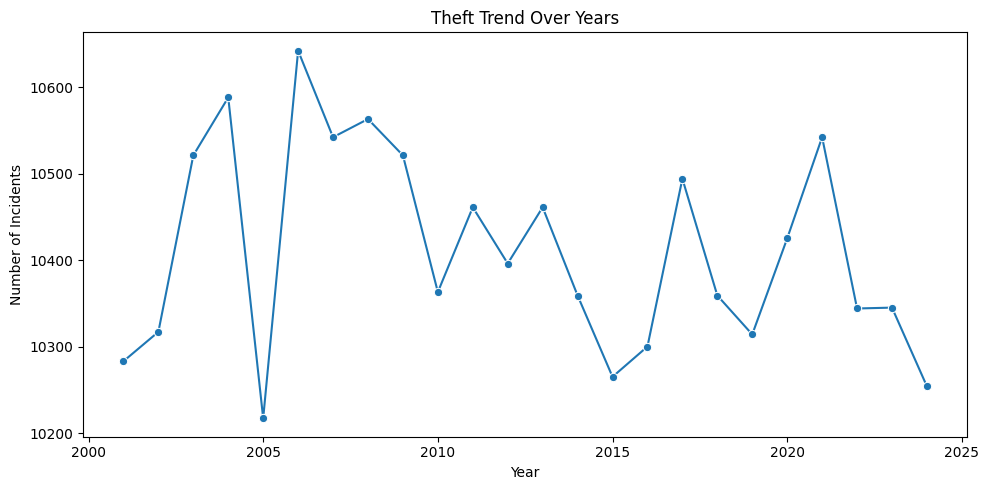

In [38]:
top_crime = df['Primary Type'].value_counts().idxmax()
df_top_crime = df[df['Primary Type'] == top_crime]

yearly_trend = df_top_crime['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o')
plt.title(f'{top_crime} Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()


C:\Users\athar\AppData\Local\Temp\ipykernel_4912\3641060739.py:26: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\athar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


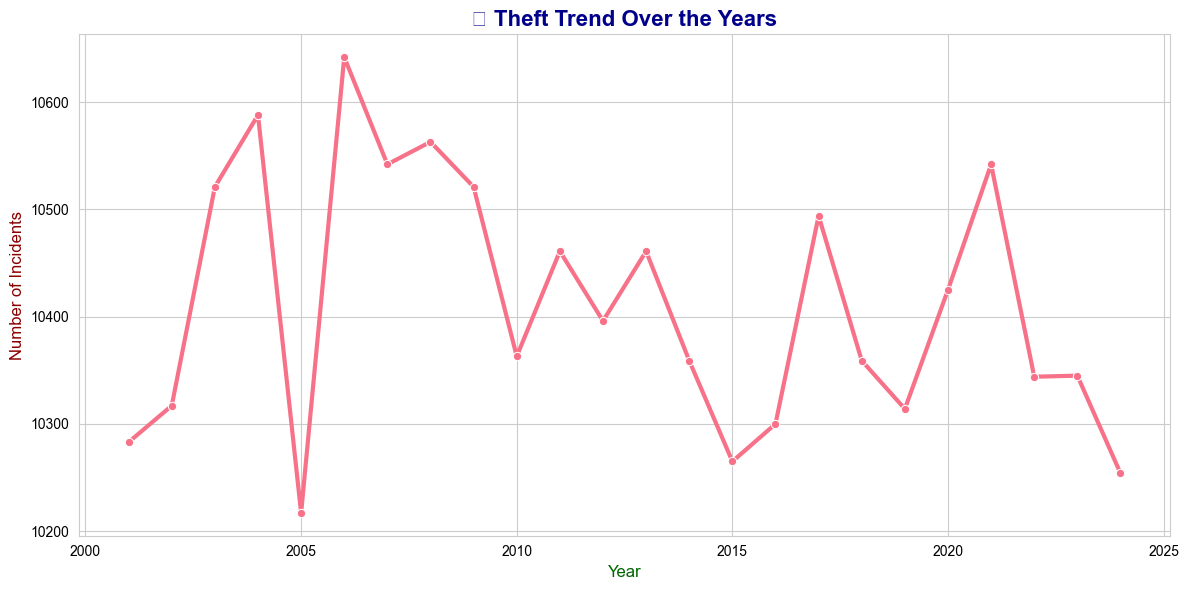

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the top crime type
top_crime = df['Primary Type'].value_counts().idxmax()
df_top_crime = df[df['Primary Type'] == top_crime]

# Count occurrences by year
yearly_trend = df_top_crime['Year'].value_counts().sort_index()

# Set a colorful theme
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Use a vibrant color palette
colors = sns.color_palette("husl", len(yearly_trend))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', linewidth=3, color=colors[0])

# Add chart details
plt.title(f"ðŸ“ˆ {top_crime} Trend Over the Years", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Year", fontsize=12, color='darkgreen')
plt.ylabel("Number of Incidents", fontsize=12, color='darkred')
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(True)
plt.tight_layout()
plt.show()
